In [75]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [24]:
DATA_ROOT = os.path.join(os.getcwd(), 'data', 'dataset')
TRAIN_PATH = os.path.join(DATA_ROOT, 'train')
train_df = pd.read_csv(os.path.join(TRAIN_PATH, 'train_output.csv'))
train_df.head()

,filename,label
0,1,1 0.438281 0.529551 0.814063 0.704492
1,2,3 0.541016 0.524324 0.849219 0.672973
2,3,2 0.492500 0.517045 0.695000 0.725000
3,4,2 0.585156 0.525000 0.692187 0.785135
4,5,3 0.385547 0.645270 0.614844 0.698649\n3 0.559...


In [13]:
all_file_list = os.listdir(TRAIN_PATH)
extention_dict = {}
for file in all_file_list:
    cur_path = os.path.join(TRAIN_PATH, file)
    if os.path.isdir(cur_path):
        continue
    extention = os.path.splitext(file)[1]
    if extention == '.csv':
        continue
    extention_dict[extention] = extention_dict.get(extention, 0) + 1

extention_dict

{'.jpg': 1204}

In [49]:
df = train_df.copy()
df.head()

,filename,label
0,1,1 0.438281 0.529551 0.814063 0.704492
1,2,3 0.541016 0.524324 0.849219 0.672973
2,3,2 0.492500 0.517045 0.695000 0.725000
3,4,2 0.585156 0.525000 0.692187 0.785135
4,5,3 0.385547 0.645270 0.614844 0.698649\n3 0.559...


In [47]:
new_data = {
    'label_idx': [],
    'x_center': [],
    'y_center': [],
    'w': [],
    'h': [],
    'bbox': []
}

for i in range(len(df)):
    label = df.iloc[i]['label']
    # multi labels
    if '\n' in label:
        label = label.split('\n')
    else:
        label = [label]

    label_idx = []
    x_center = []
    y_center = []
    w = []
    h = []
    for l in label:
        idx, x_c, y_c, width, height = l.split(' ')
        label_idx.append(int(idx))
        x_center.append(float(x_c))
        y_center.append(float(y_c))
        w.append(float(width))
        h.append(float(height))

    new_data['label_idx'].append(label_idx)
    new_data['x_center'].append(x_center)
    new_data['y_center'].append(y_center)
    new_data['w'].append(w)
    new_data['h'].append(h)

new_data = pd.DataFrame(new_data)
new_data

,label_idx,x_center,y_center,w,h
0,[1],[0.438281],[0.529551],[0.814063],[0.704492]
1,[3],[0.541016],[0.524324],[0.849219],[0.672973]
2,[2],[0.4925],[0.517045],[0.695],[0.725]
3,[2],[0.585156],[0.525],[0.692187],[0.785135]
4,"[3, 3, 3]","[0.385547, 0.559375, 0.143359]","[0.64527, 0.682432, 0.382432]","[0.614844, 0.445313, 0.286719]","[0.698649, 0.62973, 0.318919]"
...,...,...,...,...,...
1199,"[1, 1]","[0.596, 0.206]","[0.512012, 0.662162]","[0.504, 0.252]","[0.807808, 0.495495]"
1200,[0],[0.56],[0.663017],[0.6175],[0.644769]
1201,[1],[0.497656],[0.448649],[0.578125],[0.794595]
1202,[0],[0.518182],[0.589172],[0.927273],[0.821656]


In [50]:
df = pd.concat([df, new_data], axis=1)
df

,filename,label,label_idx,x_center,y_center,w,h
0,1,1 0.438281 0.529551 0.814063 0.704492,[1],[0.438281],[0.529551],[0.814063],[0.704492]
1,2,3 0.541016 0.524324 0.849219 0.672973,[3],[0.541016],[0.524324],[0.849219],[0.672973]
2,3,2 0.492500 0.517045 0.695000 0.725000,[2],[0.4925],[0.517045],[0.695],[0.725]
3,4,2 0.585156 0.525000 0.692187 0.785135,[2],[0.585156],[0.525],[0.692187],[0.785135]
4,5,3 0.385547 0.645270 0.614844 0.698649\n3 0.559...,"[3, 3, 3]","[0.385547, 0.559375, 0.143359]","[0.64527, 0.682432, 0.382432]","[0.614844, 0.445313, 0.286719]","[0.698649, 0.62973, 0.318919]"
...,...,...,...,...,...,...,...
1199,1200,1 0.596000 0.512012 0.504000 0.807808\n1 0.206...,"[1, 1]","[0.596, 0.206]","[0.512012, 0.662162]","[0.504, 0.252]","[0.807808, 0.495495]"
1200,1201,0 0.560000 0.663017 0.617500 0.644769,[0],[0.56],[0.663017],[0.6175],[0.644769]
1201,1202,1 0.497656 0.448649 0.578125 0.794595,[1],[0.497656],[0.448649],[0.578125],[0.794595]
1202,1203,0 0.518182 0.589172 0.927273 0.821656,[0],[0.518182],[0.589172],[0.927273],[0.821656]


In [52]:
unique_label = set()
for labels in df['label_idx']:
    for l in labels:
        unique_label.add(l)
unique_label

{0, 1, 2, 3}

In [53]:
max_num_labels = 0
for labels in df['label_idx']:
    if max_num_labels < len(labels):
        max_num_labels = len(labels)

max_num_labels

25

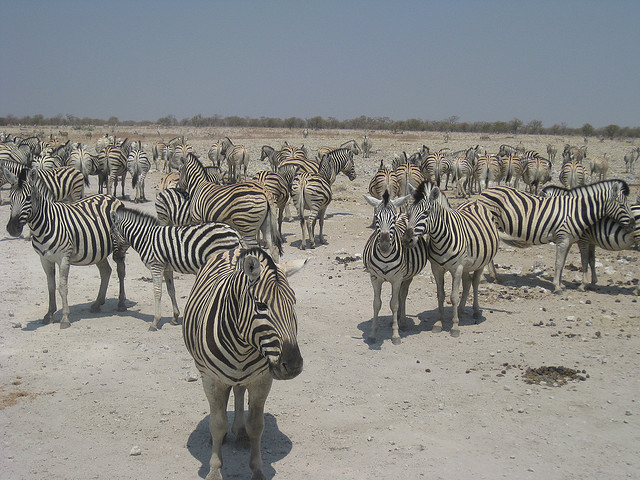

In [81]:
mask = [True if len(l) == max_num_labels else False for l in df['label_idx']]
filename = df[mask].iloc[0]['filename']
filename = str(filename).zfill(4) + '.jpg'

filepath = os.path.join(TRAIN_PATH, filename)
img = Image.open(filepath)
img

(423, 640, 3)
(1328, 1992, 3)
(440, 600, 3)
(1065, 1600, 3)


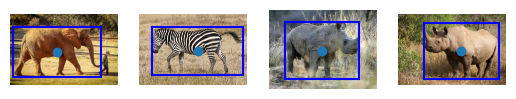

In [131]:
def img_show_by_idx(idx:int, axe):
    test_data = df.iloc[idx]
    fileName = test_data['filename']
    filePath = os.path.join(TRAIN_PATH, str(fileName).zfill(4) + '.jpg')
    img = np.asarray(Image.open(filePath))
    axe.imshow(img)
    axe.axis('off')
    print(img.shape)
    for i in range(len(test_data['label_idx'])):
        y_center = int(img.shape[0] * test_data['y_center'][i])
        x_center = int(img.shape[1] * test_data['x_center'][i])
        x_0 = x_center - int(img.shape[1] * test_data['w'][i] / 2)
        x_1 = x_center + int(img.shape[1] * test_data['w'][i] / 2)
        y_0 = y_center - int(img.shape[0] * test_data['h'][i] / 2)
        y_1 = y_center + int(img.shape[0] * test_data['h'][i] / 2)
        axe.scatter([x_center], [y_center])
        axe.plot([x_0, x_1], [y_0, y_0], c='b')
        axe.plot([x_0, x_0], [y_0, y_1], c='b')
        axe.plot([x_1, x_1], [y_1, y_0], c='b')
        axe.plot([x_0, x_1], [y_1, y_1], c='b')

fig, axs = plt.subplots(1, 4)
for i in range(4):
    img_show_by_idx(i, axs[i])

In [71]:
'1'.zfill(4)

'0001'

In [133]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")
print(model)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(